# Labb 2 - Pandas och data processing

Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.

***Uppgifter***

Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera matplotlib grafer
i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att referera till dem.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar mm.

***Uppgift 1***

I den här uppgiften ska du visualisera med hjälp av matplotlib

- a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska,
svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

Plats Huvudman Totalt
(A-F)
Flickor
(A-F)
Pojkar
(A-F)
Totalt
(A-E)
Flickor
(A-E)
Pojkar
(A-E)
Totalt
(poäng)
Flickor
(poäng)
Pojkar
(poäng)
0 Riket Samtliga 93225 45800 47425 96.1 97.9 94.4 13.6 14.5 12.7
1 Riket Kommunal 72771 35484 37287 95.7 97.6 93.8 13.3 14.3 12.4
2 Riket Enskild 20414 10297 10117 97.6 98.7 96.6 14.4 15.2 13.5
3 Riket Skolverket 40 19 21 100 100 100 15 15.9 14.2

- b) För de olika ämnena, rita en stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en
plott med subplottar

***Uppgift 2***

I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

- a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

- b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

- c) (bonus) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data
finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

***Grading***

If you have taken ideas of codes from someone or found them online, it is important that you state the source and
understand how the codes work. Write a comment next to these codes.

- Criteria for G:
solved all non-bonus tasks correctly
added relevant comments on the codes
the codes are well-structured

- Criteria for VG:
solved all tasks including bonus tasks correctly
Submission
create a public github repo when you start working with this lab
the repo should show that you have made commits into it
when you are done, send the repo URL to Learnpoint by the deadline

In [ ]:
# I den här uppgiften ska du visualisera med hjälp av matplotlib

# - a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska,
# svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

import matplotlib.pyplot as plt
import pandas as pd

#Kan man läsa in alla samtidigt på ett smidigare sätt?
df_engelska = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Engelska", header=[8])
df_matte = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Matematik", header=[8])
df_svenska = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska", header=[8])
df_andraspråk = pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", header=[8])
# df_andraspråk = df_andraspråk.drop(index=3)
df_andraspråk = df_andraspråk.replace("..", 0)
df_andraspråk

# df_dict = {
#     "Engelska": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Engelska", header=[8]),
#     "Matematik": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Matematik", header=[8]),
#     "Svenska": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska", header=[8]),
#     "Svenska som andrahandsspråk": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", header=[8]),
# }
# df = pd.DataFrame(df_dict)
# df



C:\Users\organ\AppData\Local\Temp\ipykernel_18312\2117611582.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_andraspråk = df_andraspråk.replace("..", 0)


ValueError: If using all scalar values, you must pass an index

In [178]:
# for i in range(len(column_names)):
    # df_engelska = df_engelska.rename(
    #     columns={
    #         df_engelska.columns[i]: column_names[i]
    #     }
    # )
    # df_matte = df_matte.rename(
    #     columns={
    #         df_matte.columns[i]: column_names[i]
    #     }
    # )
    # df_svenska = df_svenska.rename(
    #     columns={
    #         df_svenska.columns[i]: column_names[i]
    #     }
    # )
    # df_andraspråk = df_andraspråk.rename(
    #     columns={
    #         df_andraspråk.columns[i]: column_names[i]
    #     }
    # )

# df_engelska = df_engelska.rename(
#     columns={
#         df_engelska.columns[0]: "Plats",
#         df_engelska.columns[1]: "Huvudman",
#         df_engelska.columns[2]: "Totalt (A-F)",
#         df_engelska.columns[3]: "Flickor (A-F)",
#         df_engelska.columns[4]: "Pojkar (A-F)",
#         df_engelska.columns[5]: "Totalt (A-E)",
#         df_engelska.columns[6]: "Flickor (A-E)",
#         df_engelska.columns[7]: "Totalt (A-E)",
#         df_engelska.columns[8]: "Totalt (Poäng)",
#         df_engelska.columns[9]: "Flickor (Poäng)",
#         df_engelska.columns[10]: "Pojkar (Poäng)",
#     }
# )

column_names = ["Plats","Huvudman","Totalt (A-F)","Flickor (A-F)","Pojkar (A-F)","Totalt (A-E)","Flickor (A-E)","Totalt (A-E)","Totalt (Poäng)","Flickor (Poäng)", "Pojkar (Poäng)"]
df_sheet_list = [df_engelska, df_matte, df_svenska, df_andraspråk]

# #vill man ha dom i en lista eller som separata dataframes?
# for y in range(len(df_sheet_list)):
#     for i in range(len(column_names)):
#         df_sheet_list[y] = df_sheet_list[y].rename(
#             columns={
#                 df_sheet_list[y].columns[i]: column_names[i]
#             }
#         )
        
for df in df_sheet_list:
    df.columns = column_names

# df_engelska = df_sheet_list[0]
# df_matte = df_sheet_list[1]
# df_svenska = df_sheet_list[2]
# df_andraspråk = df_sheet_list[3]

df_sheet_list[0]
df_engelska

df_dict = {
    "Engelska": pd.read_excel("excel/riket2023_åk9_np.xlsx", sheet_name="Engelska", header=[8]),
    "Matematik": df_matte,
    "Svenska": df_svenska,
    "Svenska som andrahandsspråk": df_andraspråk,
}

df_dict["Engelska"] #[""]


,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


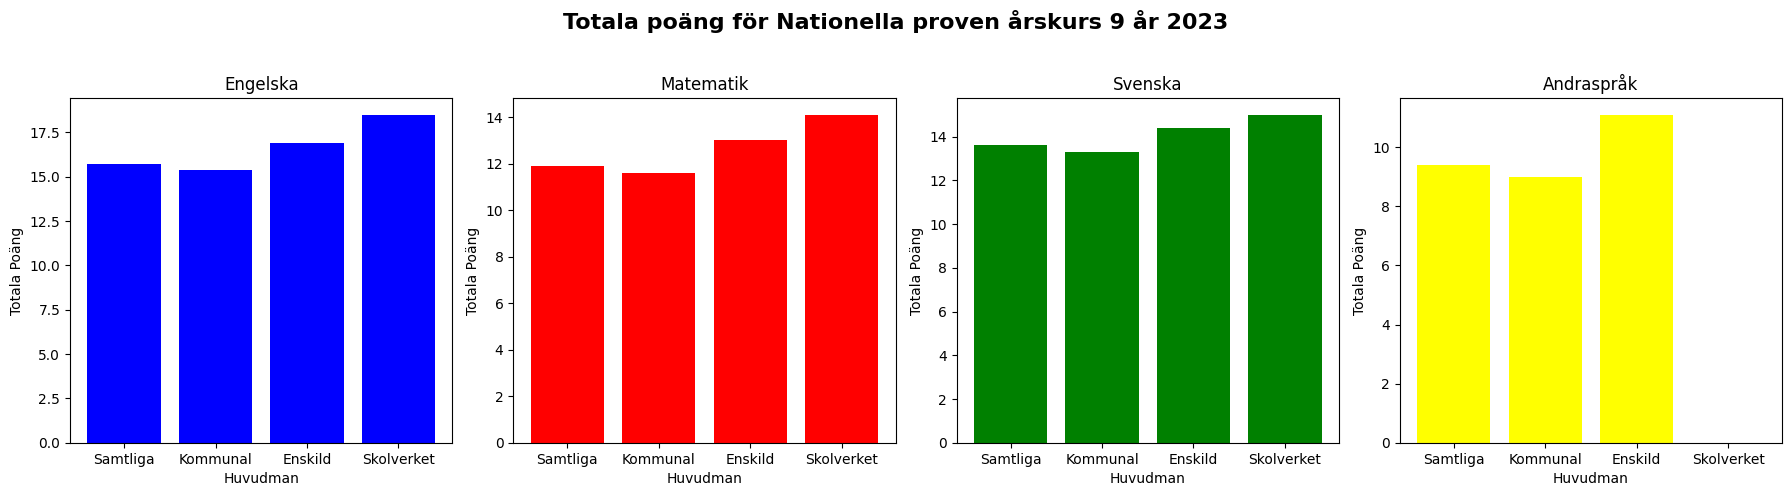

In [207]:
# - b) För de olika ämnena, rita en stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en
# plott med subplottar

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(18,5))

titles = ["Engelska", "Matematik", "Svenska", "Andraspråk"]
ax_list = [ax1,ax2,ax3,ax4]
colours = ["blue", "red", "green", "yellow"]
# for i in range(len(df_sheet_list)):
#     x = [df_sheet_list[i].get("Huvudman")]
#     y= [df_sheet_list[i].get("Totalt (Poäng)")]
# ax2.set(title="Matematik")
# ax3.set(title="Svenska")
# ax4.set(title="Andraspråk")
# fig.text(0.4,1,"Totala poäng för Nationella proven årskurs 9 år 2023\n")
# fig.
fig.suptitle("Totala poäng för Nationella proven årskurs 9 år 2023\n", fontsize=16, fontweight="bold")
for i in range(4):
    ax_list[i].set(
        title=titles[i], 
        ylabel="Totala Poäng", xlabel="Huvudman")
    ax_list[i].bar(df_sheet_list[i]["Huvudman"],df_sheet_list[i]["Totalt (Poäng)"], color=colours[i])
# ax2.bar(df_matte["Huvudman"],df_matte["Totalt (Poäng)"])
# ax3.bar(df_svenska["Huvudman"],df_svenska["Totalt (Poäng)"])
# ax4.bar(df_andraspråk["Huvudman"],df_andraspråk["Totalt (Poäng)"])
plt.tight_layout(pad=1)
plt.show()

fig.savefig("visualiseringar/barplot_nationella.png")
# x = [df_sheet_list[0].get("Huvudman")]
# y = [df_sheet_list[0].get("Totalt (Poäng)")]
# y
    